# Stock Price Predictor

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Scraping

In [2]:
import pandas_datareader as data  #for data Scraping
import datetime

start = "2010-01-01"  #YYYY-MM-DD
# end = "2020-12-31"
end = datetime.datetime.now()

In [3]:
df = data.DataReader('TTM', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,17.080000,16.830000,16.940001,16.860001,586100.0,15.805058
2010-01-04,18.090000,17.490000,17.570000,18.030001,2141700.0,16.901852
2010-01-05,17.900000,17.620001,17.780001,17.850000,2022500.0,16.733114
2010-01-06,18.010000,17.770000,17.900000,17.990000,2057800.0,16.864353
2010-01-07,17.629999,17.340000,17.389999,17.570000,2706800.0,16.470633


## Analyse Data

In [4]:
 df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-24,29.290001,29.080000,29.219999,29.240000,219100.0,29.240000
2022-08-25,29.250000,28.820000,28.840000,29.200001,534800.0,29.200001
2022-08-26,29.570000,28.490000,29.370001,28.580000,636700.0,28.580000
2022-08-29,28.680000,28.139999,28.139999,28.600000,350600.0,28.600000
2022-08-30,29.670000,28.990000,29.650000,28.990000,613700.0,28.990000


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,17.080000,16.830000,16.940001,16.860001,586100.0,15.805058
1,2010-01-04,18.090000,17.490000,17.570000,18.030001,2141700.0,16.901852
2,2010-01-05,17.900000,17.620001,17.780001,17.850000,2022500.0,16.733114
3,2010-01-06,18.010000,17.770000,17.900000,17.990000,2057800.0,16.864353
4,2010-01-07,17.629999,17.340000,17.389999,17.570000,2706800.0,16.470633


In [6]:
df = df.drop(['Date', 'Adj Close', 'High', 'Low', 'Volume'], axis = 1)
df.head()

,Open,Close
0,16.940001,16.860001
1,17.570000,18.030001
2,17.780001,17.850000
3,17.900000,17.990000
4,17.389999,17.570000


## Plotting Data

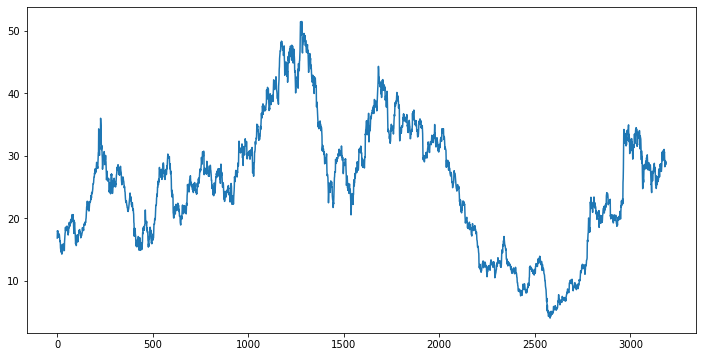

In [7]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)

### Moving Averages

In [8]:
ma100 = df.Close.rolling(100).mean()  #Moving Average 100
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
3183    27.8621
3184    27.8619
3185    27.8508
3186    27.8417
3187    27.8351
Name: Close, Length: 3188, dtype: float64

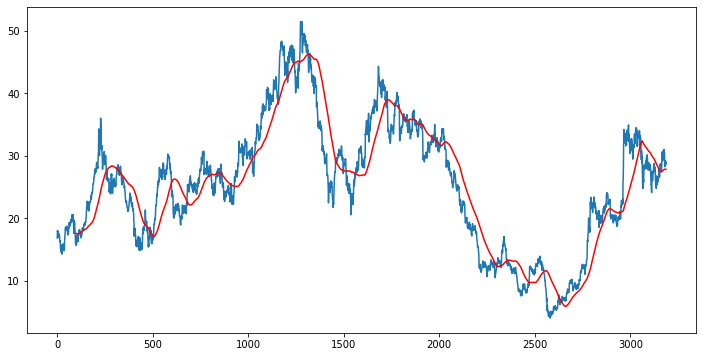

In [9]:
plt.figure(figsize = (12, 6))  #Plotting with Moving Average
plt.plot(df.Close)
plt.plot(ma100, 'r')

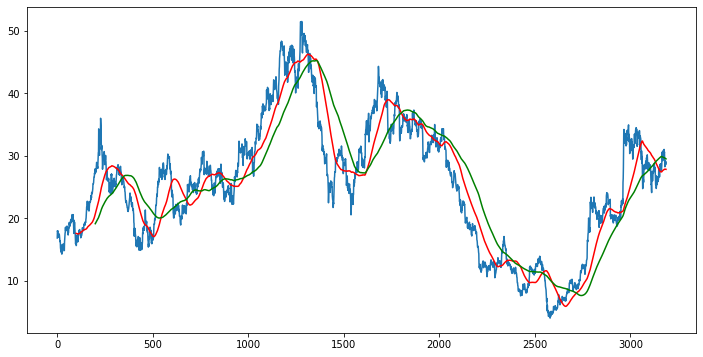

In [10]:
ma200 = df.Close.rolling(200).mean()  #Moving Average 200 and plotting
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r', label = 'Moving Average 100')
plt.plot(ma200, 'g', label = 'Moving Average 200')

In [11]:
df.shape

(3188, 2)

## Splitting Data into Training and Testing

In [12]:
data_training = pd.DataFrame(df['Close'][0: int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70): int(len(df))])
              
             
print(data_training.shape)
print(data_testing.shape)

(2231, 1)
(957, 1)


## Data Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range = (0, 1))

In [14]:
data_training_array = scalar.fit_transform(data_training)
data_training_array

array([[0.13647705],
       [0.16566867],
       [0.16117764],
       ...,
       [0.04041916],
       [0.04466068],
       [0.04141716]])

## Input Output Splitting

In [15]:
# Considering data for last 100 day only to calculate data for today -> TIME SERIES ANALOGY

x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train) #Converting into np array
x_train.shape

(2131, 100, 1)

## ML Model

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

### Adding Layers

In [17]:
model = Sequential()

#Adding first layer
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

#Adding second layer
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

#Adding third layer
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

#Adding fourth layer
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

#Adding Dense Layer -> Connect these 4 layers
model.add(Dense(units = 1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

### Compiling Model

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')  #For Time Series Analysis -> Loss = mean_squared_error

### Fitting data

In [20]:
print(x_train.shape)
print(y_train.shape)

(2131, 100, 1)
(2131,)


In [21]:
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
67/67 [==============================] - 23s 248ms/step - loss: 0.0391
Epoch 2/50
67/67 [==============================] - 17s 258ms/step - loss: 0.0101
Epoch 3/50
67/67 [==============================] - 16s 233ms/step - loss: 0.0089
Epoch 4/50
67/67 [==============================] - 15s 217ms/step - loss: 0.0084
Epoch 5/50
67/67 [==============================] - 16s 238ms/step - loss: 0.0070
Epoch 6/50
67/67 [==============================] - 15s 224ms/step - loss: 0.0064
Epoch 7/50
67/67 [==============================] - 15s 222ms/step - loss: 0.0064
Epoch 8/50
67/67 [==============================] - 16s 237ms/step - loss: 0.0060
Epoch 9/50
67/67 [==============================] - 15s 217ms/step - loss: 0.0063
Epoch 10/50
67/67 [==============================] - 14s 215ms/step - loss: 0.0052
Epoch 11/50
67/67 [==============================] - 15s 218ms/step - loss: 0.0054
Epoch 12/50
67/67 [==============================] - 17s 257ms/step - loss: 0.0047
Epoch 13/50
6

### Saving the Model

In [22]:
model.save('keras_model.h5')

## Testing Model

In [23]:
data_testing.head()

,Close
2231,13.11
2232,12.12
2233,12.18
2234,12.26
2235,12.57


In [24]:
past_100_days = data_training.tail(100)  #for prediction of 2231st value we need data for past 100 days that is in training data
# final_df = past_100_days.append(data_testing, ignore_index = True)
final_df = pd.concat([past_100_days, data_testing])
final_df = final_df.reset_index(drop = True)
final_df.head()

,Close
0,22.370001
1,22.190001
2,22.250000
3,20.860001
4,20.240000


### Scaling Testing Data

In [25]:
input_data = scalar.fit_transform(final_df)
input_data

array([[0.59267666],
       [0.58684386],
       [0.5887881 ],
       ...,
       [0.793908  ],
       [0.79455611],
       [0.80719381]])

In [26]:
input_data.shape

(1057, 1)

### Input Output Split

In [27]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(957, 100, 1)
(957,)


### Making Predictions

In [28]:
y_predicted = model.predict(x_test)

30/30 [==============================] - 5s 79ms/step


In [29]:
print(y_predicted.shape)
print(y_test.shape)

(957, 1)

#### Scaling Predicted Values to Original

In [32]:
scalar.scale_  #factor by which all values were scale down

array([0.03240441])

In [34]:
scale_factor = 1 / scalar.scale_

y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

## Plotting Predicted Values

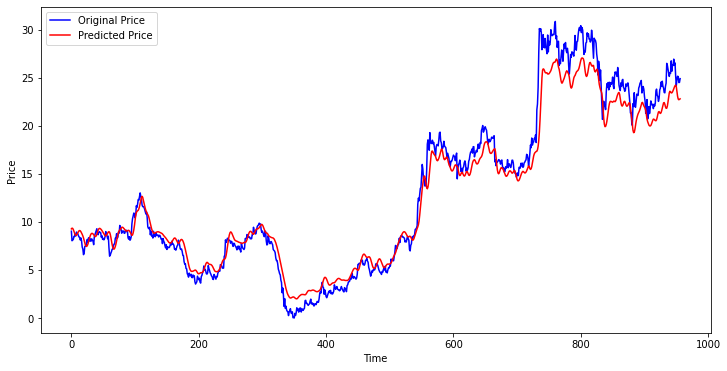

In [35]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Prediction Into Future

In [214]:
n = 30

# from datetime import date, timedelta

end_date = datetime.date.today().isoformat()   

In [215]:
df_future = data.DataReader('TTM', 'yahoo', start, end_date)

In [216]:
df_future = df_future.reset_index()
df_future = df_future.drop(['Date', 'Adj Close', 'High', 'Low', 'Volume', 'Open'], axis = 1)

In [217]:
df_future

,Close
0,16.860001
1,18.030001
2,17.850000
3,17.990000
4,17.570000
...,...
3184,29.200001
3185,28.580000
3186,28.600000
3187,28.990000


In [218]:
input_future = np.array(scalar.fit_transform(df_future))
# input_future = input_future / scale_factor
input_future.shape

(3189, 1)

In [224]:
input_future = input_future[-100:]  #for last 100 values only
input_future

array([[0.26967715],
       [0.29436591],
       [0.29056763],
       [0.29352183],
       [0.2846592 ],
       [0.28107194],
       [0.28043892],
       [0.27220931],
       [0.28107194],
       [0.28381516],
       [0.27980586],
       [0.28107194],
       [0.27368641],
       [0.26376872],
       [0.25743829],
       [0.25997044],
       [0.25490609],
       [0.23633677],
       [0.23148343],
       [0.2226208 ],
       [0.24414432],
       [0.24330026],
       [0.24604346],
       [0.21797847],
       [0.21523527],
       [0.21924457],
       [0.22641908],
       [0.22304282],
       [0.23253851],
       [0.23401561],
       [0.24182316],
       [0.24984174],
       [0.24435534],
       [0.23802489],
       [0.2422452 ],
       [0.23359357],
       [0.23464865],
       [0.22726314],
       [0.25532813],
       [0.26630092],
       [0.2831821 ],
       [0.2861363 ],
       [0.28909053],
       [0.30554968],
       [0.29373285],
       [0.30343952],
       [0.30618274],
       [0.298

In [225]:
x = []
y = []
x.append(input_future)
x = np.array(x)

In [226]:
for i in range(100, 100+n):
    op = model.predict(x)
    y.append(op)
    x = np.delete(x, 0, axis = 1)
    x = np.append(x, op)
    x = x.reshape(1,100,1)

1/1 [==============================] - 0s 43ms/step


In [227]:
y = np.array(y)
y = y.reshape(30,)

<function matplotlib.pyplot.show(close=None, block=None)>

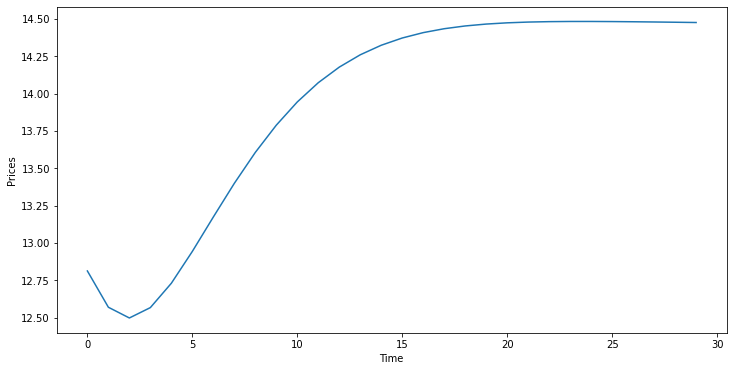

In [228]:
y = y / scalar.scale_

plt.figure(figsize = (12,6))
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('Prices')
plt.show